## Goal of This Phase

Your goal in this week is not accuracy, not optimization, and not deep NLP.  
Your only goal is to build a working, end-to-end text → number → model pipeline that you will reuse and improve later.


---


## PART 1 — Understand the Dataset


### 1. Load the Yelp review dataset.


In [1]:
import pandas as pd

dataset = pd.read_csv("F:\GitHub_Clones\streaming-and-nlp\data\\nlp-learn\\raw_reviews.csv")

<>:3: SyntaxWarning: invalid escape sequence '\G'
<>:3: SyntaxWarning: invalid escape sequence '\G'
C:\Users\sudha\AppData\Local\Temp\ipykernel_30924\2287224011.py:3: SyntaxWarning: invalid escape sequence '\G'
  dataset = pd.read_csv("F:\GitHub_Clones\streaming-and-nlp\data\\nlp-learn\\raw_reviews.csv")


In [2]:
dataset.shape

(14630, 11)

In [3]:
dataset.describe()

,stars,useful,funny,cool,timestamp
count,14630.000000,14630.000000,14630.000000,14630.000000,1.463000e+04
mean,3.856459,0.903418,0.254614,0.349556,1.766511e+09
std,1.345415,2.039673,0.944729,1.102027,1.008595e+04
min,1.000000,0.000000,0.000000,0.000000,1.766508e+09
25%,3.000000,0.000000,0.000000,0.000000,1.766509e+09
50%,4.000000,0.000000,0.000000,0.000000,1.766510e+09
75%,5.000000,1.000000,0.000000,0.000000,1.766511e+09
max,5.000000,91.000000,26.000000,44.000000,1.766579e+09


In [4]:
dataset.columns

Index(['_id', 'review_id', 'user_id', 'business_id', 'stars', 'useful',
       'funny', 'cool', 'text', 'date', 'timestamp'],
      dtype='object')

In [5]:
dataset.head()

,_id,review_id,user_id,business_id,stars,useful,funny,cool,text,date,timestamp
0,694ac75e36ea26b7f718a304,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11,1.766508e+09
1,694ac75e36ea26b7f718a305,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18,1.766508e+09
2,694ac75e36ea26b7f718a306,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30,1.766508e+09
3,694ac75e36ea26b7f718a307,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03,1.766508e+09
4,694ac75e36ea26b7f718a308,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15,1.766508e+09


In [6]:
dataset.useful.value_counts()

useful
0     8717
1     3086
2     1334
3      636
4      312
5      172
6      116
7       77
8       50
9       34
10      22
11      19
12      13
13       6
14       5
15       4
19       4
18       3
17       3
21       3
20       2
16       2
22       2
31       2
34       1
23       1
91       1
61       1
54       1
28       1
Name: count, dtype: int64

---


### 2. Remove not required columns.

-   Keep columns, \_id, review_id, business_id, stars, text, date


In [7]:
df = dataset[["_id", "review_id", "business_id", "stars", "text", "date"]]

In [8]:
del dataset

In [9]:
df.shape

(14630, 6)

In [10]:
df.head()

,_id,review_id,business_id,stars,text,date
0,694ac75e36ea26b7f718a304,KU_O5udG6zpxOg-VcAEodg,XQfwVwDr-v0ZS3_CbbE5Xw,3,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,694ac75e36ea26b7f718a305,BiTunyQ73aT9WBnpR9DZGw,7ATYjTIgM3jUlt4UM3IypQ,5,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,694ac75e36ea26b7f718a306,saUsX_uimxRlCVr67Z4Jig,YjUWPpI6HXG530lwP-fb2A,3,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,694ac75e36ea26b7f718a307,AqPFMleE6RsU23_auESxiA,kxX2SOes4o-D3ZQBkiMRfA,5,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,694ac75e36ea26b7f718a308,Sx8TMOWLNuJBWer-0pcmoA,e4Vwtrqf-wpJfwesgvdgxQ,4,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


---


### 3. Simple EDA.

-   Review Length Distribution
-   Stars Distribution
-   Contains any emojis?


In [11]:
import seaborn as sns

In [12]:
df["text"] = df.text.str.strip()
df["text_length"] = df.text.str.len()

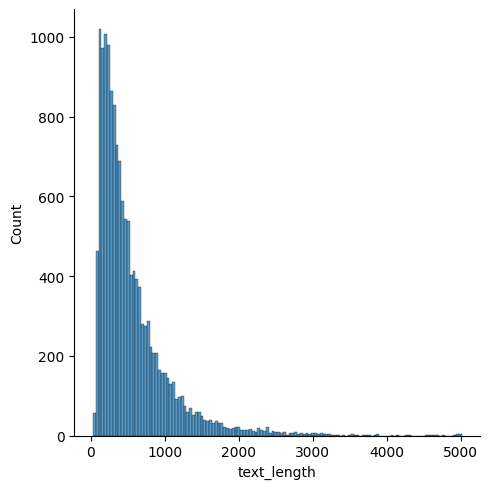

In [13]:
sns.displot(df, x="text_length")

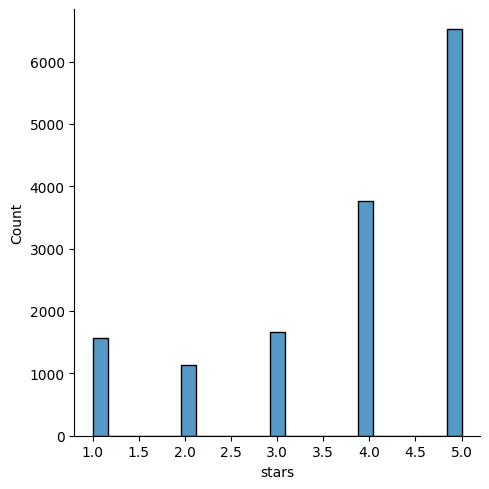

In [14]:
sns.displot(df, x="stars")

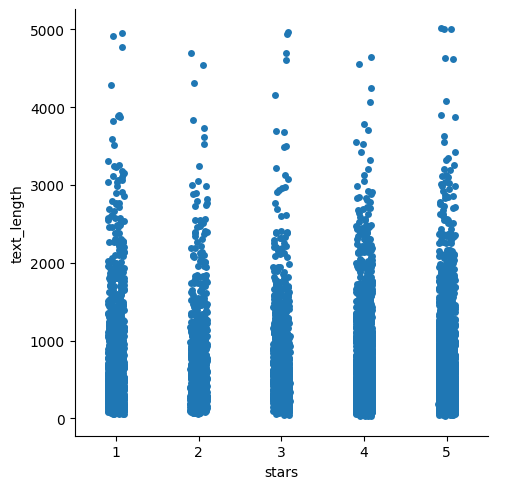

In [15]:
sns.catplot(df, x="stars", y="text_length")

In [16]:
import emoji

df["emoji_count"] = emoji.emoji_count(df.text.str.strip())

In [17]:
df.emoji_count.value_counts()

emoji_count
0    14630
Name: count, dtype: int64

---


## PART 2 — Text Cleaning

Perform following on the text.

-   lower all text
-   Remove html tags
-   Newlines
-   Extra whitespace
-   Emojis


In [18]:
def lower_text(text: str):
    return text.lower()

In [19]:
import re

html_pattern = re.compile(r'<(\w+)\b[^>]*>.*?</\1>')

def remove_html_tags(text):
    text=html_pattern.sub("",text )
    return text

#### Pattern Breakdown:

1. **<(\w+) (The Opening Tag & Capture Group)**
    - `<`: Matches the literal "less than" character.
    - `(\w+)`: Matches one or more "word characters" (letters, digits, or underscores).
    - `(...)`: This is a capturing group. It "remembers" the tag name it found (e.g., div or span) so it can be used later in the pattern.
2. **\b[^>]\*> (Tag Attributes)**
    - `\b`: A word boundary anchor. It ensures the tag name is a whole word and doesn't bleed into other characters.
    - `[^>]\*`: Matches any character that is not a >. This allows the regex to match tags with attributes, such as `<div class="main">` or `<a href="...">`.
    - `>` : Matches the closing "greater than" character of the opening tag.
3. **.\*? (The Inner Content)**
    - `.`: Matches any character (except newlines, unless the "dot-all" flag is used).
    - `\*?`: A non-greedy quantifier. It tells the engine to match the smallest amount of text possible until it reaches the next part of the pattern (the closing tag). Without the ?, it might accidentally match from the first `<div>` to the very last `</div>` in your entire document.
4. **</\1> (The Closing Tag)**
    - `</`: Matches the literal characters starting a closing tag.
    - `\1`: This is a backreference. It tells the regex engine to match the exact same text that was captured by the first group (\w+). If the opening tag was <div>, \1 will only match div.
    - `>` : Matches the literal end of the closing tag.


In [20]:
import re

new_line_pattern = re.compile(r"\n")

def remove_new_lines(text):
    text = new_line_pattern.sub(" ", text)
    return text

In [21]:
import re

multiple_white_space_pattern = re.compile(r'\s{2, }')

def remove_white_space(text):
    text = multiple_white_space_pattern.sub(' ', text)
    return text

In [22]:
import emoji

def remove_emoji(text):
    text = emoji.replace_emoji(text, '')
    return text

#### Creating Scikit learn pipeline to apply this transformation

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
import numpy as np

lower_text_transformer = FunctionTransformer(np.vectorize(lower_text))
remove_html_tags_transformer = FunctionTransformer(np.vectorize(remove_html_tags))
remove_new_lines_transformer = FunctionTransformer(np.vectorize(remove_new_lines))
remove_white_space_transformer = FunctionTransformer(np.vectorize(remove_white_space))
remove_emoji_transformer = FunctionTransformer(np.vectorize(remove_emoji))


text_cleaning_pipeline = Pipeline(
    [
        ("to_lowercase", lower_text_transformer),
        ("remove_html_tags", remove_html_tags_transformer),
        ("remove new line sep", remove_new_lines_transformer),
        ("extra white space remover", remove_white_space_transformer),
        ("remove emoji", remove_emoji_transformer),
    ]
)

cleaned_text = text_cleaning_pipeline.fit_transform(df.text.values)
df["cleaned_text"] = cleaned_text

In [24]:
df.head()

,_id,review_id,business_id,stars,text,date,text_length,emoji_count,cleaned_text
0,694ac75e36ea26b7f718a304,KU_O5udG6zpxOg-VcAEodg,XQfwVwDr-v0ZS3_CbbE5Xw,3,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11,515,0,"if you decide to eat here, just be aware it is..."
1,694ac75e36ea26b7f718a305,BiTunyQ73aT9WBnpR9DZGw,7ATYjTIgM3jUlt4UM3IypQ,5,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18,833,0,i've taken a lot of spin classes over the year...
2,694ac75e36ea26b7f718a306,saUsX_uimxRlCVr67Z4Jig,YjUWPpI6HXG530lwP-fb2A,3,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30,339,0,family diner. had the buffet. eclectic assortm...
3,694ac75e36ea26b7f718a307,AqPFMleE6RsU23_auESxiA,kxX2SOes4o-D3ZQBkiMRfA,5,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03,243,0,"wow! yummy, different, delicious. our favo..."
4,694ac75e36ea26b7f718a308,Sx8TMOWLNuJBWer-0pcmoA,e4Vwtrqf-wpJfwesgvdgxQ,4,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15,534,0,cute interior and owner (?) gave us tour of up...


In [25]:
df['cleaned_text_length'] = df.cleaned_text.str.len()

In [ ]:
df[(df['text_length'] != df['cleaned_text_length'])]

,_id,review_id,business_id,stars,text,date,text_length,emoji_count,cleaned_text,cleaned_text_length
5739,694acbf6066404602a1be427,W_GfPqBYv9H5WNNDGD0awQ,gu9H6XoryCn07BfPsSdeSw,4,Loved it. The woman was very nice. I believe h...,2015-04-01 21:11:09,279,0,loved it. the woman was very nice. i believe h...,278
7043,694acd01066404602a1be93f,tVeAUvc2-YOV3ylkvBsRcA,PPcz-0UtIJ8O7xDT551y2g,5,This restaurant was absolutely incredible. The...,2016-09-19 01:32:12,378,0,this restaurant was absolutely incredible. the...,377
11679,694ad0b0066404602a1bfb5b,RzGSv8skwrW0RZugxumkLw,vUrTGX_7HxqeoQ_6QCVz6g,5,This is definitely the best breakfast place in...,2018-03-04 17:05:22,444,0,this is definitely the best breakfast place in...,445


---


## PART 3 - Tokenization

## Tokenization:

-   the crucial first step of breaking down raw text into smaller, meaningful units called tokens
-   each token can be words, characters, sub-words, or sentences, making text manageable for machines to process, analyze, and understand
-   for tasks like translation, sentiment analysis, or chatbots

### Types of tokenization

-   **Word Tokenization**:
    -   Splits text into individual words based on spaces or punctuation.
    -   Example: `"NLP is fun!"` becomes `["NLP", "is", "fun", "!"]`.
-   **Sub-word Tokenization**:
    -   Breaks words into smaller meaningful units (morphemes), like prefixes or suffixes.
    -   It handles rare words or misspellings effectively. Example: `"unhappiness"` becomes `["un", "happiness"]`.
-   **Character Tokenization**:
    -   Treats every single character as a token. It is useful for languages without clear word boundaries, like Chinese or Japanese.
-   **Sentence Tokenization**:
    -   Segments large blocks of text into distinct sentences.


----

## Word Tokenizer:

-   Simply breaks text into individual words.
-   breaking a stream of text into individual words or unit token.
-   Used on language with clear boundaries; eg. English (space acts as separator)

### Core Approaches:

-   **Whitespace Tokenizer**:
    -   Splits text whenever a space is encountered.
-   **Punctuation-based Tokenizer**:
    -   Splits on basis of both Punctuation and Whitespace
    -   can treat each punctuation as a standalone token
-   **Rule-based Tokenization**
    -   Predefined linguistic rules or regex to handle complex cases like `do'nt` -> `["do", "n't"]` or hyphenated words.
-   **Multi-Word Expression**
    -   Groups multiple words into a single token if they represent a single entity
    -   Eg. San Diego, Natural Language Processing

### Key Challenges

-   **Out-of-Vocabulary (OOV) Words**:
    -   Word tokenizers struggle with rare or new words not present in their training vocabulary
    -   often replacing them with a generic [UNK] (unknown) token, which loses semantic information.
-   **Ambiguity**:
    -   Deciding whether to split entities like `"New York"` or contractions like `"can't"` can lead to inconsistent results.
-   **Language Limitations**:
    -   It is ineffective for languages like Chinese, Japanese, or Thai that do not use spaces to separate words.
-   **Vocabulary Size**:
    -   For large datasets, the number of unique word tokens can explode, requiring massive computational resources to process.


----

## Punctuation Based Tokenization:

- Rule based technique
- treats punctuation marks as primary boundary markers to segment
- overcomes issue of tokens containing punctuation marks.
- isolates punctuation marks as their own distinct token

### Key Characteristics

- **Isolates Symbols**:
  - separates marks like common, periods etc points from the word they touch.
- **Dual Utility**:
  - Either **discard** punctuation to focus solely on words or **retain** it is as separates tokens
  - Essential for understanding sentence structure or sentiment
- **Deterministic Logic**:
  - Operates on fixed logic or regular expression.
  - Ensures consistence results for identical inputs.

### Implementations:

- NLTK's: `WordPunctTokenizer`
- SpaCyL
- Regular Expression: patterns like `\w+` to find words ignoring punctuation.

### Challenges:

- **Contractions**:
  - Words like `don't` and `it's` may be split into multiple fragment
  - it can strip the word from it's indented meaning
  - eg. `it's` -> `["it", "'", "s"]`
- **Abbreviations**:
  - It may incorrectly split abbreviations like "U.S.A." into single letters and periods
  - eg: `U.S.A` -> `["U", ".", "S", ".", "A", "."]`
- **Compound Words**:
  - Hyphenated terms might be broken into multiple tokens. Losing there unified context
  - `"state-of-the-art"` -> `["state", "-" ,"of", "-" ,"the", "-" ,"art"]`


----

## Treebank Tokenizer

- Rule based tokenization method for english.
- associated with the annotation convention of the Penn Treebank corpus
- Uses regular expression to break down text into token in a linguistically consistent manner.
- helps in syntactic analysis

### Key Characteristics

- **Contractions**:

  - splits standard english contraction into separate tokens
  - eg. `"don't"` becomes `["do", "n't"]`, and `"they'll"` becomes `["they", "'ll"]`

- **Punctuation**:
  - Most punctuations char treated as separate tokens; but specific rules are applied.
    - It splits phrase-terminating punctuation (like ?, !, ;, ,) from adjacent words.
    - Periods at the end of a line are separated.
    - Decimal numbers (e.g., $3.88) are kept as a single token, preserving the numerical integrity.

- **Assumptions**:
    - Assumes that text has already been segmented into sentences before word level tokenization.


In [27]:
from typing import List


def word_tokenizer(text: str) -> List[str]:
    return text.strip().split(" ")


word_tokenizer("This is example of word tokenizer.")

['This', 'is', 'example', 'of', 'word', 'tokenizer.']

In [28]:
df["word_tokens"] = df.cleaned_text.apply(word_tokenizer)

In [29]:
tokens_in_text = [len(i) for i in df['word_tokens']]

In [30]:
sum(tokens_in_text) / len(tokens_in_text), min(tokens_in_text), max(tokens_in_text)

(101.87334244702666, 3, 1006)

----

## PART 4 - Lemmatization

-   Lemmatization is NLP technique that reduces words to their base or dictionary form.
-   considering context and meaning, ensuring the output is a valid word
-   lemmatization uses morphological analysis and part-of-speech tagging to find the true root

### How it works

-   **Contextual Analysis**: Analyzes the word's meaning and its role (part of speech) in the sentence.
-   **Dictionary Lookup**: Uses a vocabulary (lemma) to find the canonical form.
-   **Examples**:
    -   "better" becomes "good".
    -   "am," "is," "are," "was," "were" all become "be".
    -   "mice" becomes "mouse".

### Why it's important

-   **Reduces Data Size**:
    -   Groups similar words, making datasets smaller and more efficient for analysis.
-   **Improves Accuracy**:
    -   Finds meaningful roots, unlike stemming, which might create non-words (e.g., "studies" -> "studi").
-   **Enhances NLP Tasks**:
    -   Makes chatbots, search engines, and sentiment analysis more effective by understanding word variations.


### Lemmatization Techniques

#### 1. Rule Based Lemmatization

-   predefined rules are applied to a word to remove suffixes and get the root form
-   works well for regular words but may not handle irregularities well
-   **Example** : "walked" -> "walk"
-   it doesn't account for irregular word forms like "better" which should be lemmatized to "good".

#### 2. Dictionary-Based Lemmatization

-   uses a predefined dictionary or lexicon such as WordNet
-   it accounts for exceptions and irregular words
-   languages with well-established dictionaries.
-   **For example**:

    -   'running' -> 'run'
    -   'better' -> 'good'
    -   'went' -> 'go

#### 3. Machine Learning-Based Lemmatization

-   uses algorithms trained on large datasets to automatically identify the base form of words
-   highly flexible and can handle irregular words and linguistic nuances
-   more adaptive and can generalize across different word forms
-   ideal for complex tasks involving diverse vocabularies


### Lemmatization vs. Stemming

-   **Lemmatization**:
    -   Context-aware, dictionary-based, yields actual words `(e.g., "caring" -> "care")`.
-   **Stemming**:
    -   Rule-based, chops suffixes, might yield non-words `(e.g., "caring" -> "car")`.


### Why we need this
This reduces vocabulary size and noise.  
Later, when embeddings and transformers appear, you’ll know why this mattered earlier.

In [31]:
### Performing Lemmatization using spacy
import spacy
import numpy as np


nlp = spacy.load("en_core_web_sm", disable=["parser", "ner", "attribute_ruler"])

with nlp.select_pipes(disable=["parser", "ner"]):
    df["lemma_tokens"] = [
        [token.lemma_ for token in doc]
        for doc in nlp.pipe(
            df["cleaned_text"],
            batch_size=500,
            n_process=-1,
        )
    ]

In [32]:
df.head()

,_id,review_id,business_id,stars,text,date,text_length,emoji_count,cleaned_text,cleaned_text_length,word_tokens,lemma_tokens
0,694ac75e36ea26b7f718a304,KU_O5udG6zpxOg-VcAEodg,XQfwVwDr-v0ZS3_CbbE5Xw,3,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11,515,0,"if you decide to eat here, just be aware it is...",515,"[if, you, decide, to, eat, here,, just, be, aw...","[if, you, decide, to, eat, here, ,, just, be, ..."
1,694ac75e36ea26b7f718a305,BiTunyQ73aT9WBnpR9DZGw,7ATYjTIgM3jUlt4UM3IypQ,5,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18,833,0,i've taken a lot of spin classes over the year...,833,"[i've, taken, a, lot, of, spin, classes, over,...","[i, 've, taken, a, lot, of, spin, classes, ove..."
2,694ac75e36ea26b7f718a306,saUsX_uimxRlCVr67Z4Jig,YjUWPpI6HXG530lwP-fb2A,3,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30,339,0,family diner. had the buffet. eclectic assortm...,339,"[family, diner., had, the, buffet., eclectic, ...","[family, diner, ., had, the, buffet, ., eclect..."
3,694ac75e36ea26b7f718a307,AqPFMleE6RsU23_auESxiA,kxX2SOes4o-D3ZQBkiMRfA,5,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03,243,0,"wow! yummy, different, delicious. our favo...",243,"[wow!, , yummy,, different,, , delicious., , ,...","[wow, !, , yummy, ,, different, ,, , delicio..."
4,694ac75e36ea26b7f718a308,Sx8TMOWLNuJBWer-0pcmoA,e4Vwtrqf-wpJfwesgvdgxQ,4,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15,534,0,cute interior and owner (?) gave us tour of up...,534,"[cute, interior, and, owner, (?), gave, us, to...","[cute, interior, and, owner, (, ?, ), gave, us..."


In [33]:
lemma_text_tokens = [len(i) for i in df['lemma_tokens']]

In [34]:
sum(lemma_text_tokens) / len(lemma_text_tokens), min(lemma_text_tokens), max(lemma_text_tokens)


(117.14825700615174, 4, 1131)

In [38]:
df[(df['lemma_tokens'] != df['word_tokens'])].shape

(14577, 12)

----

## Stop word Removal
- Frequent and low-info words removal

### Key Benefits of Stop word removal

1. **Dimensionality Reduction**

    - Decreased the overall size of dataset
    - leads to smaller vector space and fewer feature
    - critical for traditional ML model

2. **Computational Efficiency**

    - reducing length of text reduces computational load
    - results in faster model training and inference times

3. **Noise Reduction**

    - Stop words can obscure more meaningful terms
    - removal allows algo to focus on "keywords" that carry core context and intent of the text

4. **Improved Accuracy**
    - Filtering stop words prevents terms from distorting predictions
    - leads to better performance and more distinct cluster.

### When to be cautious

1. **Sentiments Analysis**

    - Removal words like `but` or `not` can completely reverse the meaning of the sentence.
    - eg. `The movie is not good` becomes `movie good`.

2. **Language and Modeling & Translation**

    - For task like Machine translation and text summarization stop words are essential for maintaining grammatical structure

3. **Search Queries and Specific Phrases**
    - Removing stop words can cause issues when searching for proper nouns that consist mainly of stop words


In [ ]:
##

['…',
 '……',
 ',',
 ':',
 ';',
 '\\!',
 '\\?',
 '¿',
 '؟',
 '¡',
 '\\(',
 '\\)',
 '\\[',
 '\\]',
 '\\{',
 '\\}',
 '<',
 '>',
 '_',
 '#',
 '\\*',
 '&',
 '。',
 '？',
 '！',
 '，',
 '、',
 '；',
 '：',
 '～',
 '·',
 '।',
 '،',
 '۔',
 '؛',
 '٪',
 '\\.\\.+',
 '…',
 "\\'",
 '"',
 '”',
 '“',
 '`',
 '‘',
 '´',
 '’',
 '‚',
 ',',
 '„',
 '»',
 '«',
 '「',
 '」',
 '『',
 '』',
 '（',
 '）',
 '〔',
 '〕',
 '【',
 '】',
 '《',
 '》',
 '〈',
 '〉',
 '〈',
 '〉',
 '',
 '⟦',
 '⟧',
 '[\\u00A6\\u00A9\\u00AE\\u00B0\\u0482\\u058D\\u058E\\u060E\\u060F\\u06DE\\u06E9\\u06FD\\u06FE\\u07F6\\u09FA\\u0B70\\u0BF3-\\u0BF8\\u0BFA\\u0C7F\\u0D4F\\u0D79\\u0F01-\\u0F03\\u0F13\\u0F15-\\u0F17\\u0F1A-\\u0F1F\\u0F34\\u0F36\\u0F38\\u0FBE-\\u0FC5\\u0FC7-\\u0FCC\\u0FCE\\u0FCF\\u0FD5-\\u0FD8\\u109E\\u109F\\u1390-\\u1399\\u1940\\u19DE-\\u19FF\\u1B61-\\u1B6A\\u1B74-\\u1B7C\\u2100\\u2101\\u2103-\\u2106\\u2108\\u2109\\u2114\\u2116\\u2117\\u211E-\\u2123\\u2125\\u2127\\u2129\\u212E\\u213A\\u213B\\u214A\\u214C\\u214D\\u214F\\u218A\\u218B\\u2195-\\u2199\\u21

## PART 5 — Stopwords

- remove default stop words
- 